In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

In [3]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
features = O.Features.get_features(imgs, feature_type="orb", norm_type="minmax")

get2D                    ...took    42.234104 seconds


In [4]:
features

[array([771., 770., 770., 767., 774., 771., 768., 771., 769., 770., 768.,
        773., 768., 769., 769., 768., 774., 770., 773., 770., 768., 772.,
        770., 772., 769., 773., 770., 773.], dtype=float32),
 array([2812., 2786., 2767., 2812., 2789., 2776., 2753., 2846., 2842.,
        2843., 2843., 2752., 2812., 2836., 2789., 2871., 2789., 2789.,
        2845., 2781., 2749., 2813., 2855., 2782., 2819., 2829., 2836.,
        2829.], dtype=float32),
 array([3147., 3124., 3124., 3163., 3077., 3196., 3160., 3144., 3139.,
        3083., 3077., 2999., 3097., 3149., 3048., 3193., 3111., 3065.,
        3133., 3131., 3167., 3012., 3099., 3095., 3110., 3186., 3145.,
        3126.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([2826., 2825., 3053., 2948., 2995., 3000., 3068., 3056., 3117.,
        3078., 3187., 3011., 2942., 2825., 2893., 2825., 2913., 2825.,
        2870.,

In [5]:
agruments = {"contamination": .18, "verbose": False}

In [6]:
OLD = O.OutlierDetector(run_id='orb', imgs=imgs, features=features, number_bad=8, verbose=False, timing=True, kwargs=agruments)

Running 1 ECOD... Running 1 LOF... Running 1 OCSVM... Running 1 IForest... Running 1 CBLOF... Running 1 COPOD... Running 1 SOS... 

/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/pyod/models/sos.py:202: RuntimeWarning: overflow encountered in multiply
  beta[i] = beta[i] * 2.0


Running 1 KDE... Running 1 Sampling... Running 1 GMM... Running 1 PCA... Running 1 MCD... Running 1 LMDD... Running 1 COF... Running 1 HBOS... 

/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/pyod/models/cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/pyod/models/cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Running 1 KNN... Running 1 AvgKNN... Running 1 MedKNN... Running 1 SOD... Running 1 INNE... Running 1 FB... Running 1 LODA... Running 1 SUOD... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Running 1 AE... Error: The number of neurons should not exceed the number of features
Running 1 VAE... Error: The number of neurons should not exceed the number of features
Running 1 SOGAAL... Running 1 MOGAAL... Running 1 DeepSVDD... Running 1 AnoGAN... run_all_algorithms       ...took    94.454676 seconds
OD __init__              ...took    94.454997 seconds


In [7]:
OLD.results

({'HBOS': 0.25,
  'SOD': 0.25,
  'MCD': 0.125,
  'COF': 0.125,
  'KNN': 0.125,
  'INNE': 0.125,
  'LODA': 0.125,
  'ECOD': 0.0,
  'LOF': 0.0,
  'OCSVM': 0.0,
  'IForest': 0.0,
  'CBLOF': 0.0,
  'COPOD': 0.0,
  'SOS': 0.0,
  'KDE': 0.0,
  'Sampling': 0.0,
  'GMM': 0.0,
  'PCA': 0.0,
  'LMDD': 0.0,
  'AvgKNN': 0.0,
  'MedKNN': 0.0,
  'FB': 0.0,
  'SUOD': 0.0,
  'SOGAAL': 0.0,
  'MOGAAL': 0.0,
  'DeepSVDD': 0.0,
  'AnoGAN': 0.0,
  'AE': -1,
  'VAE': -1},
 {'AE': ValueError('The number of neurons should not exceed the number of features'),
  'VAE': ValueError('The number of neurons should not exceed the number of features')})

In [8]:
scores, labels = O.OutlierDetector.detect_outliers(features, pyod_algorithm="HBOS")

In HBOS algorithm


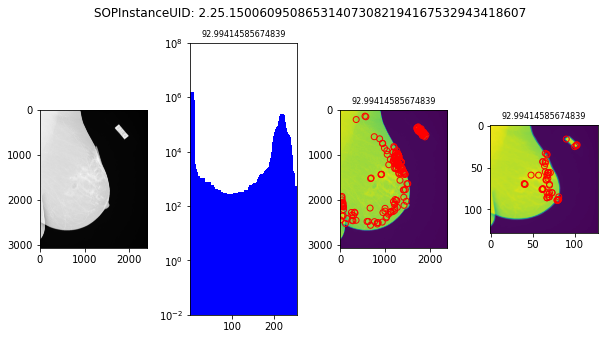

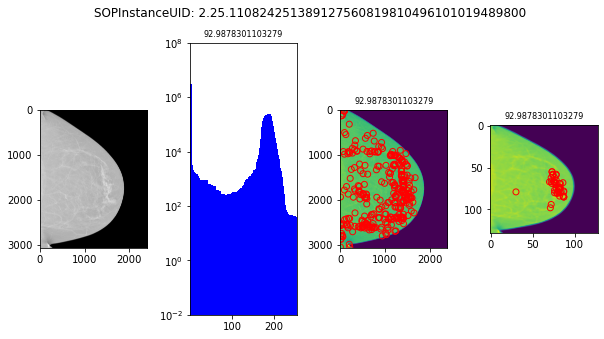

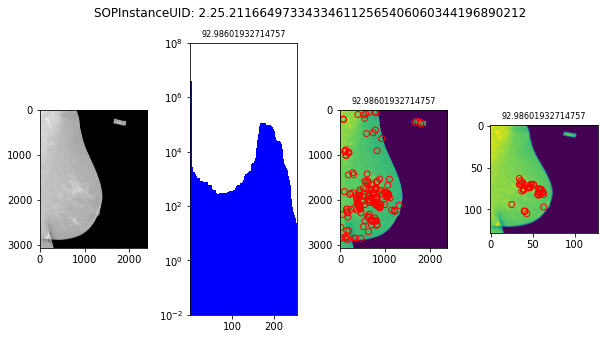

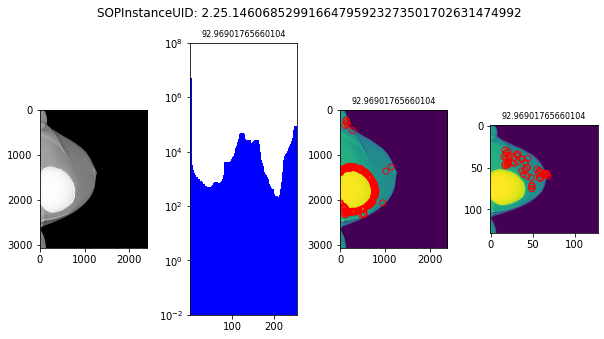

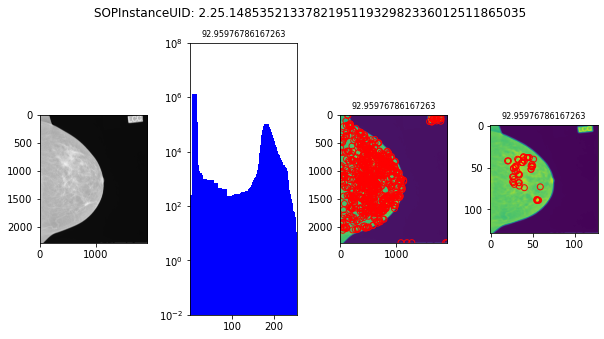

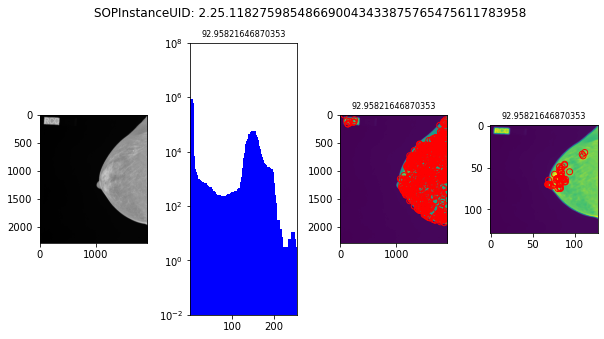

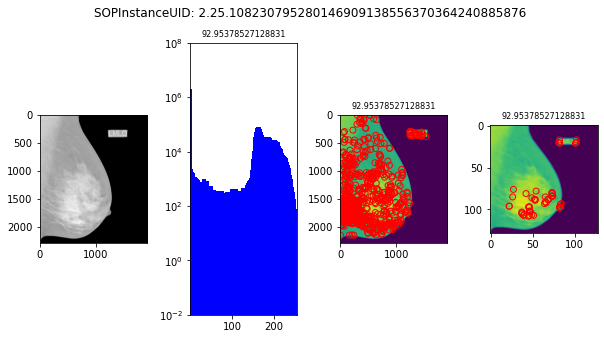

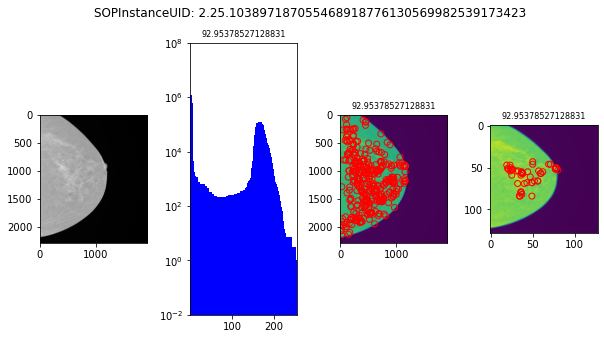

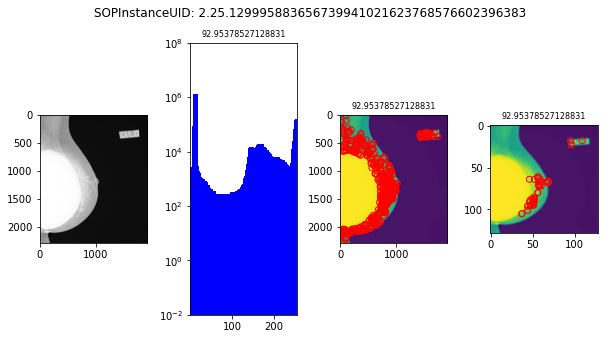

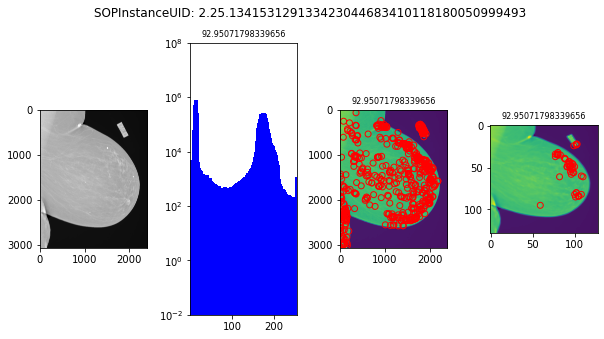

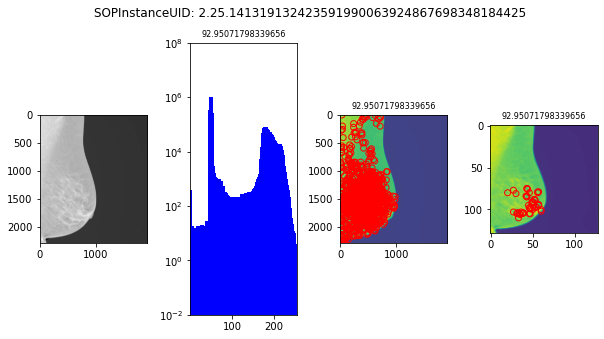

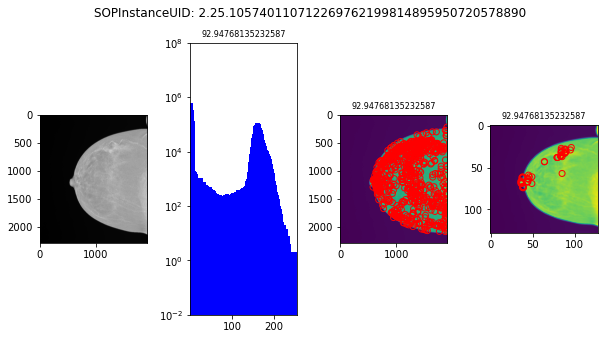

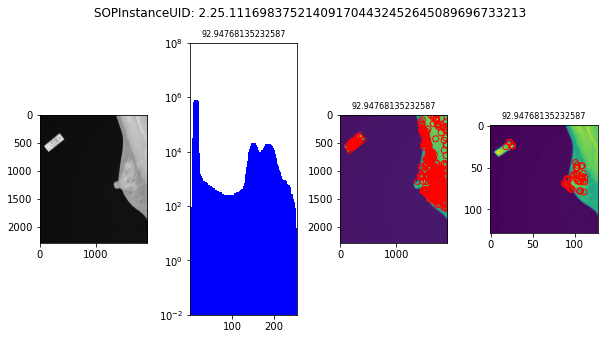

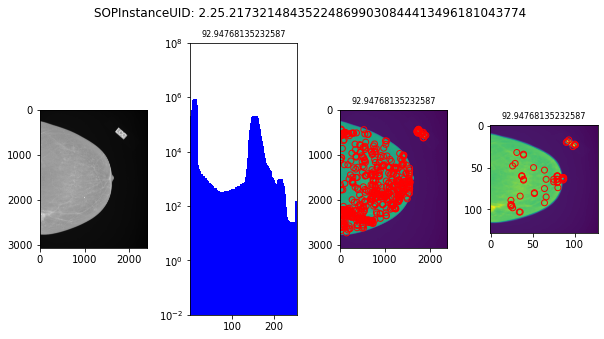

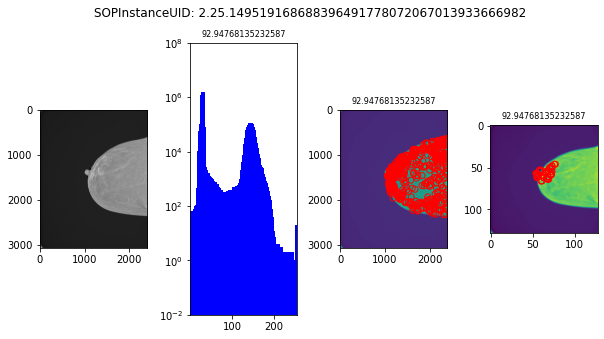

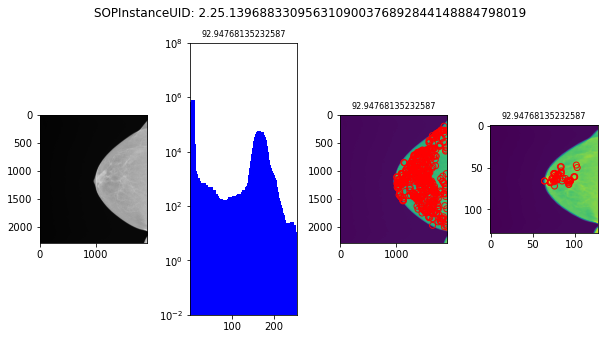

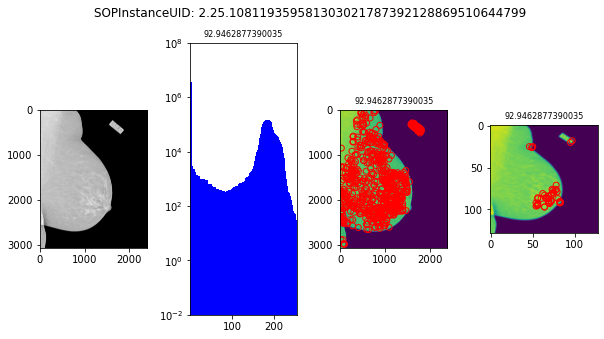

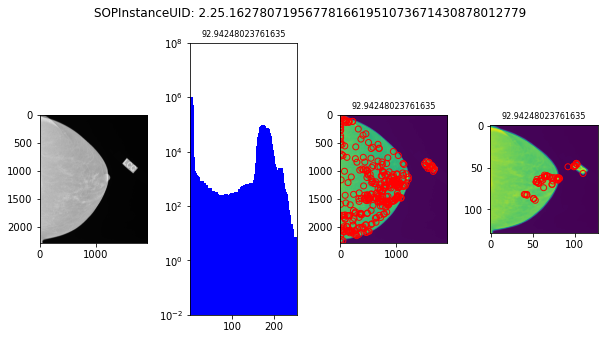

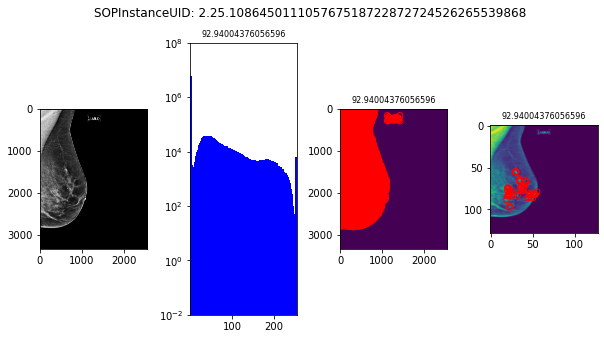

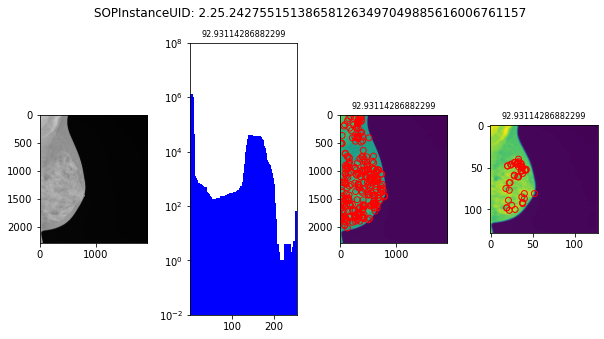

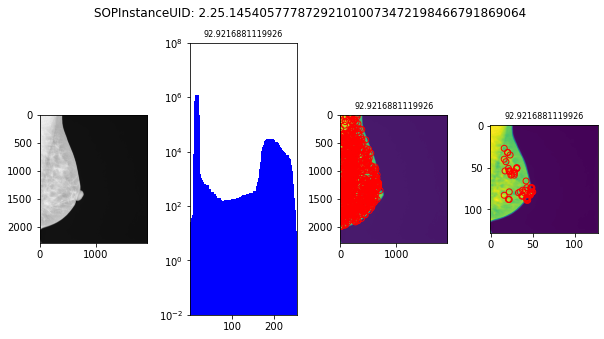

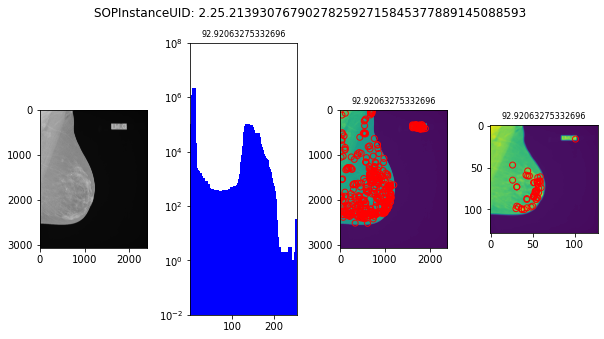

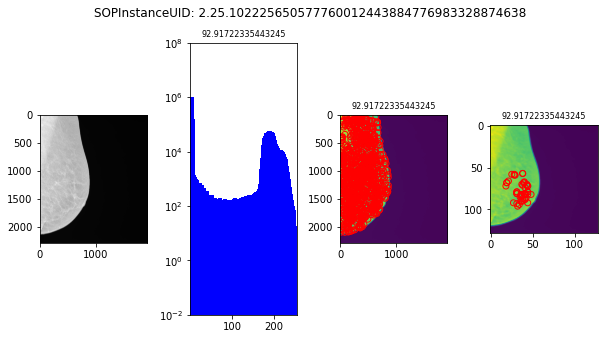

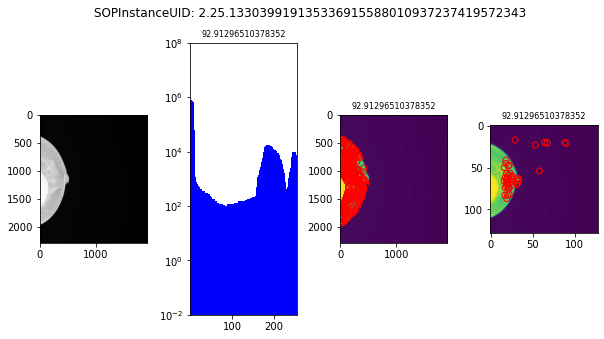

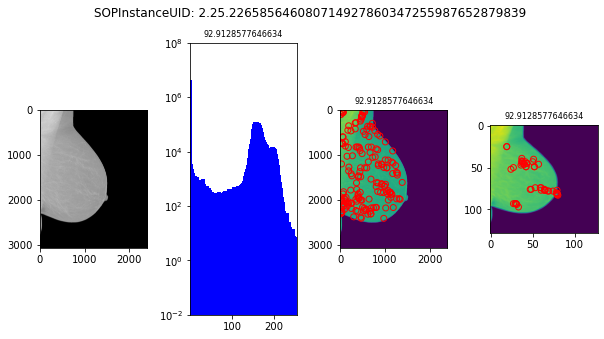

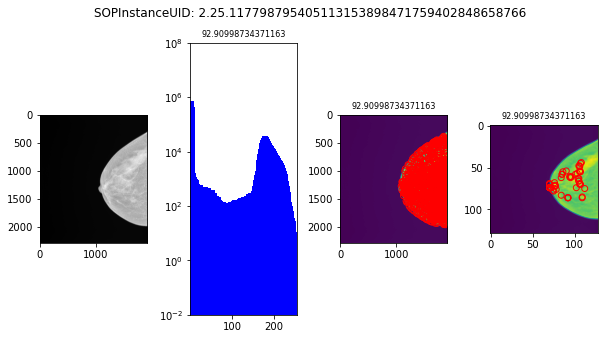

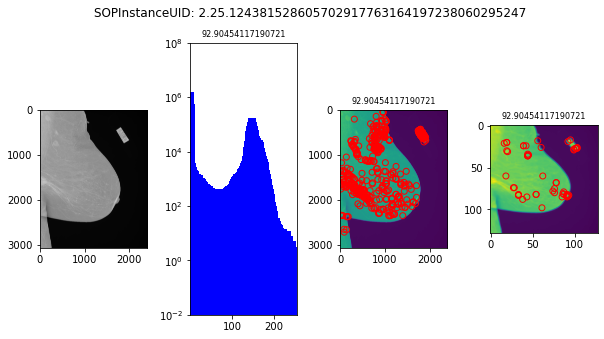

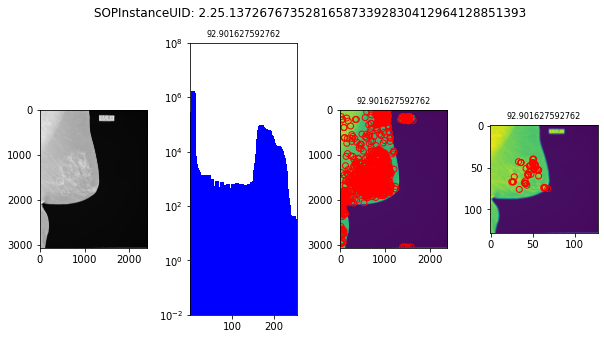

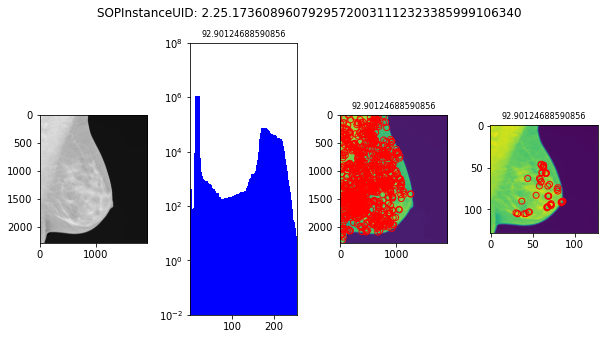

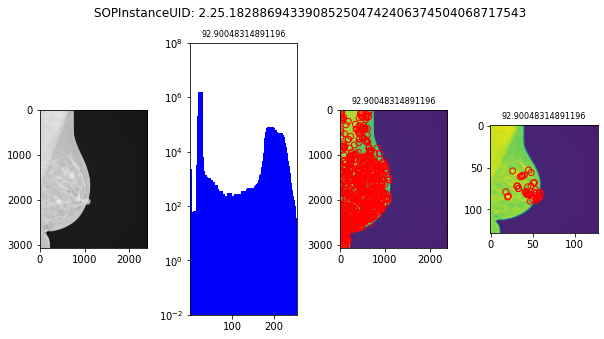

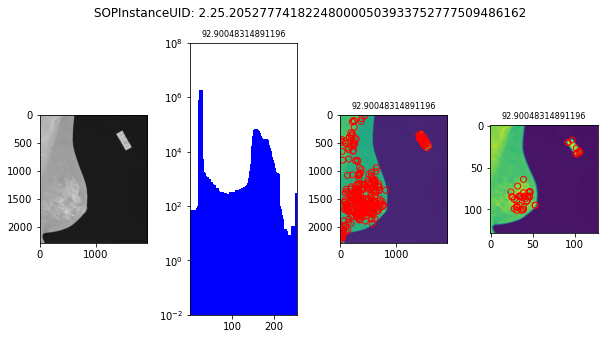

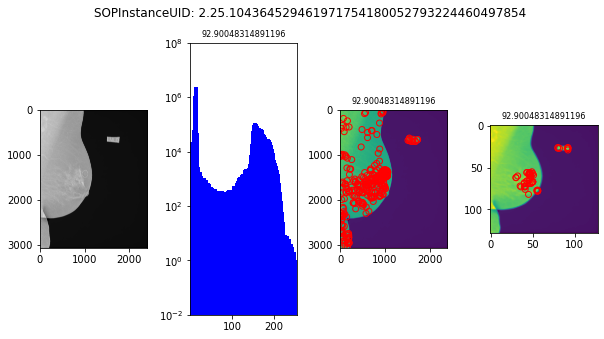

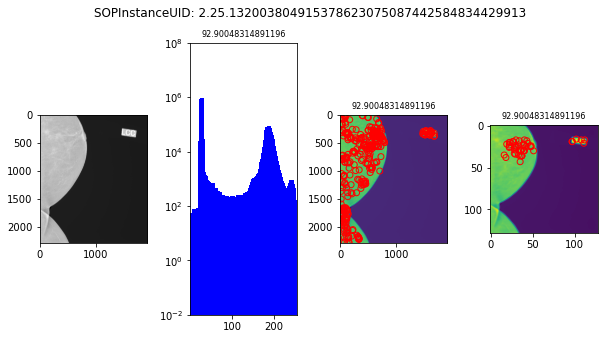

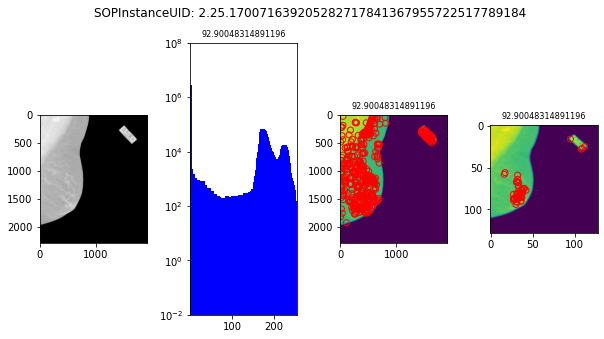

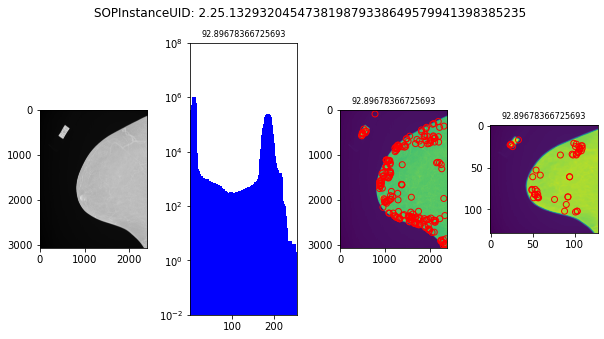

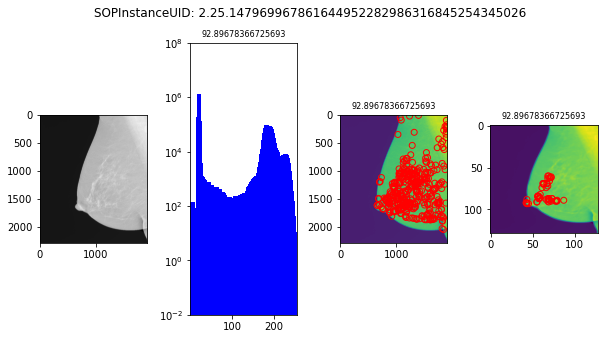

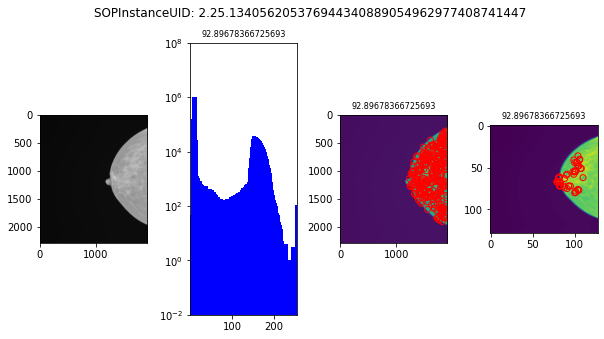

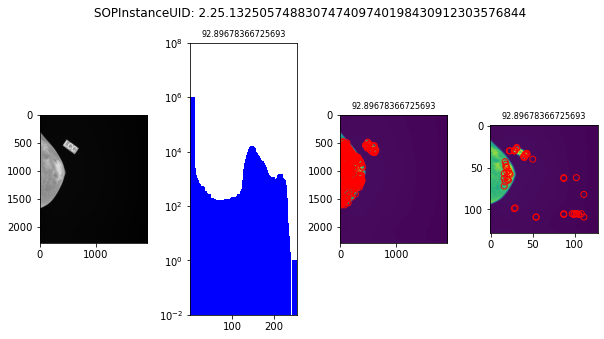

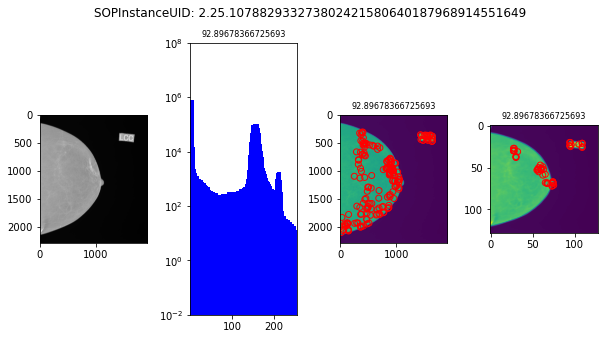

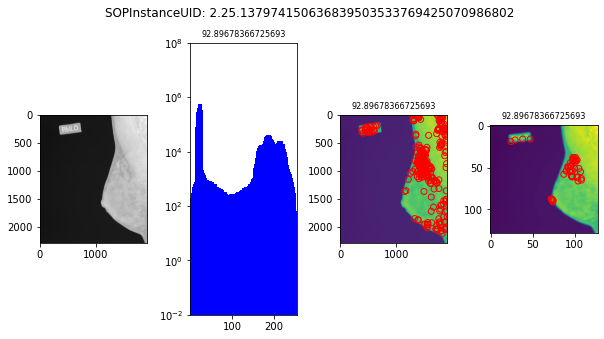

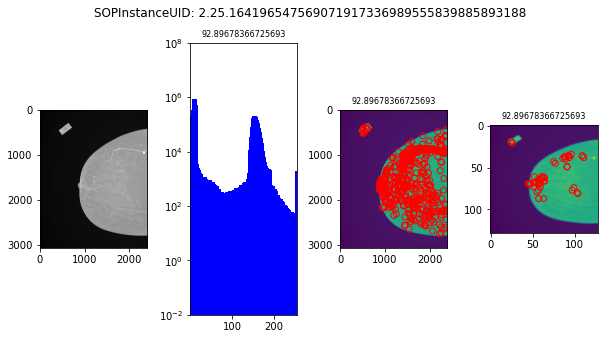

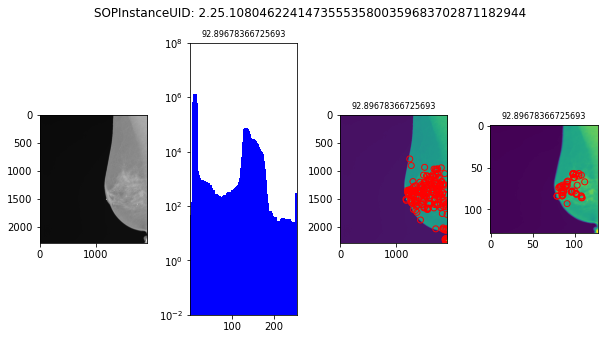

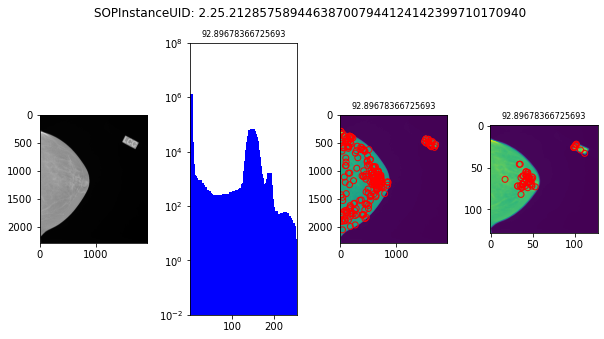

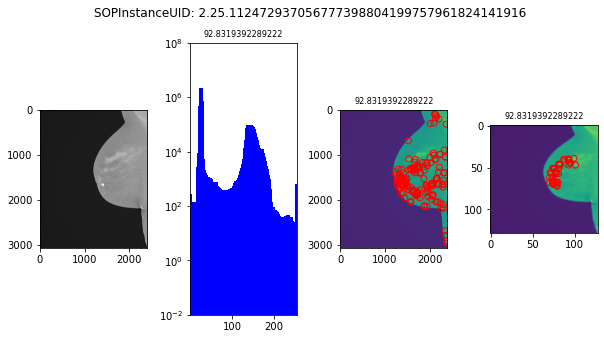

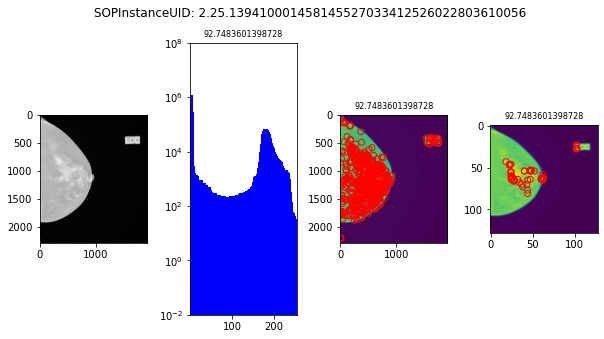

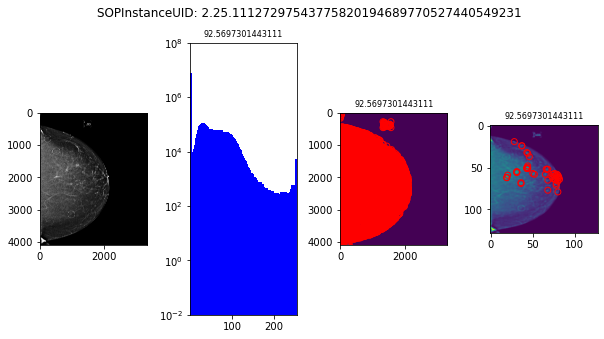

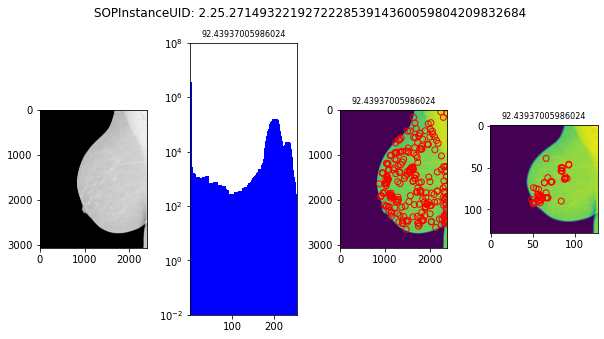

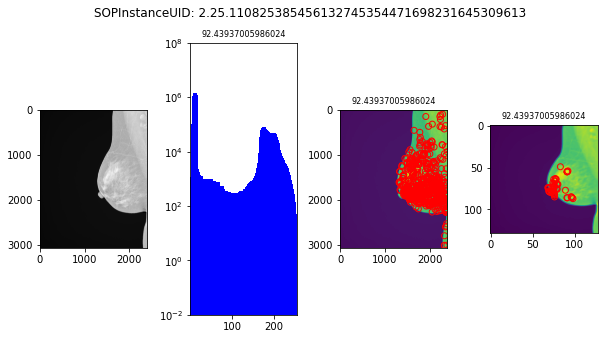

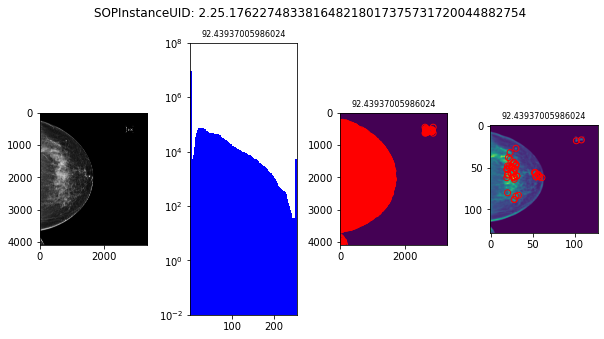

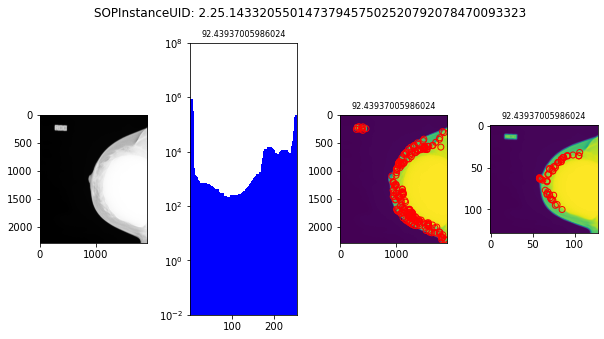

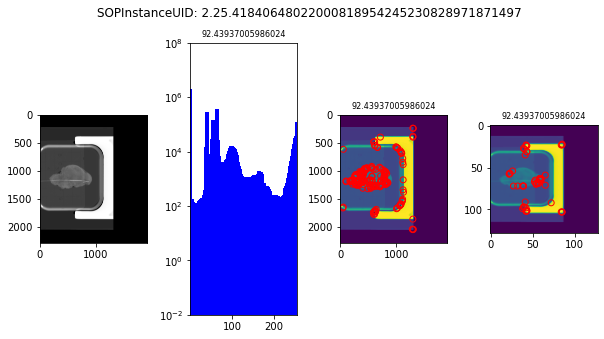

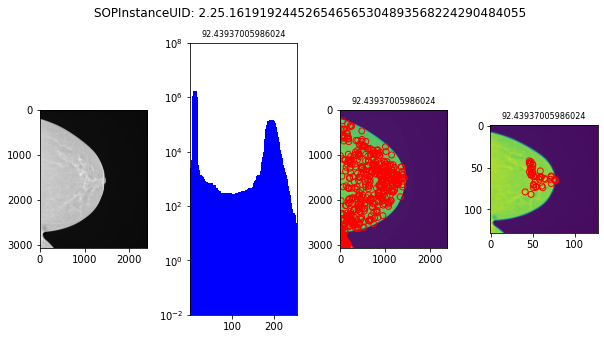

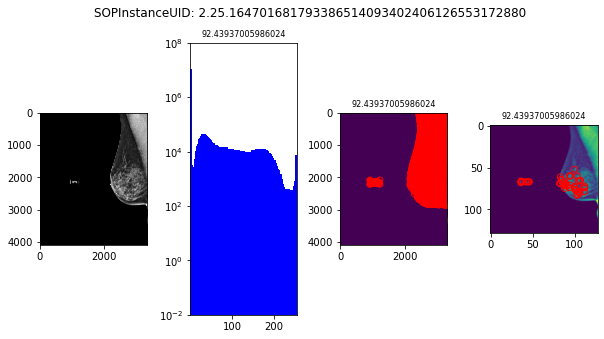

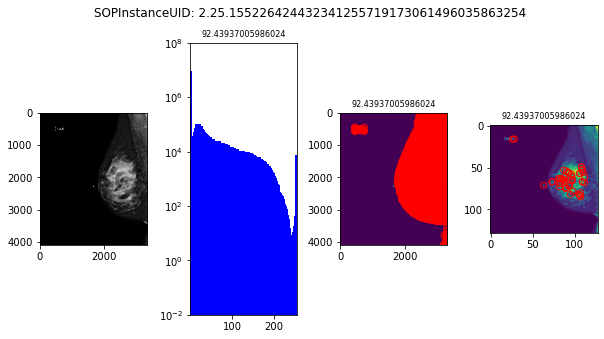

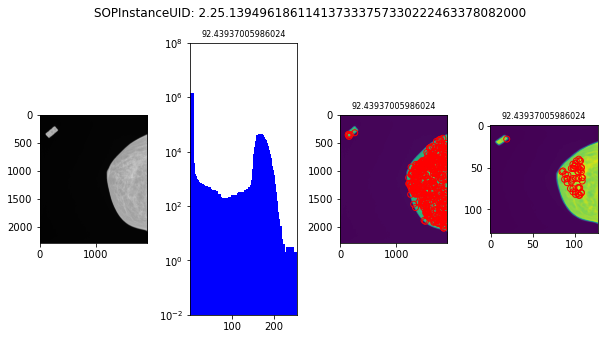

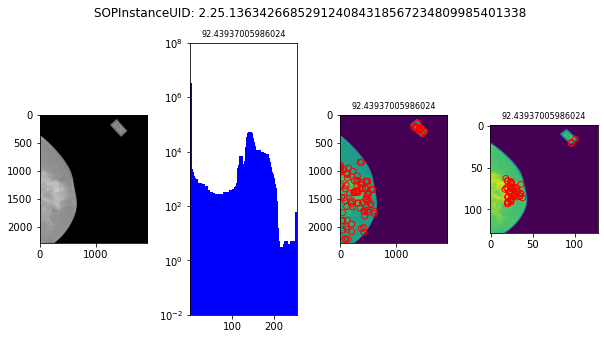

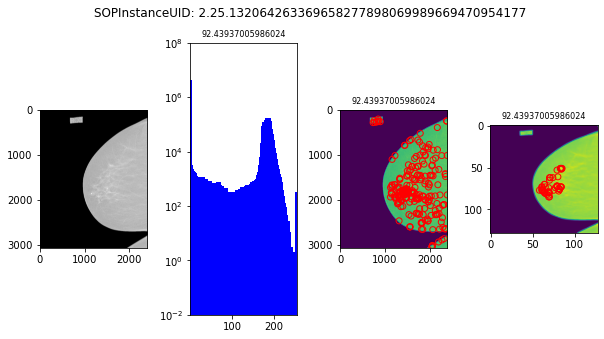

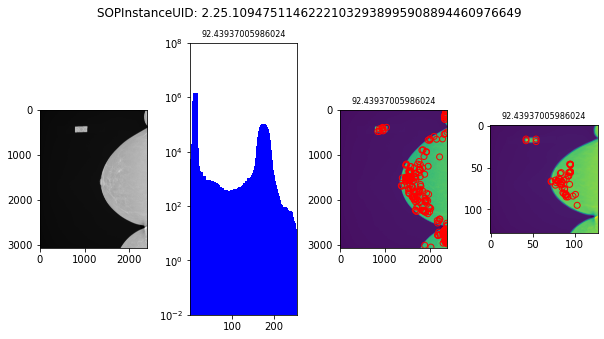

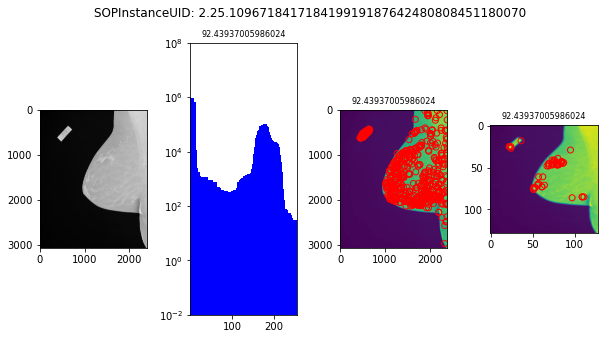

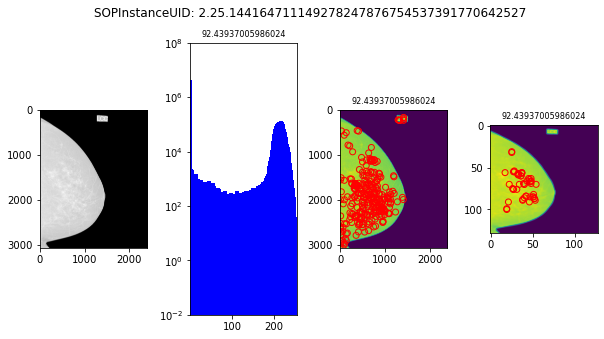

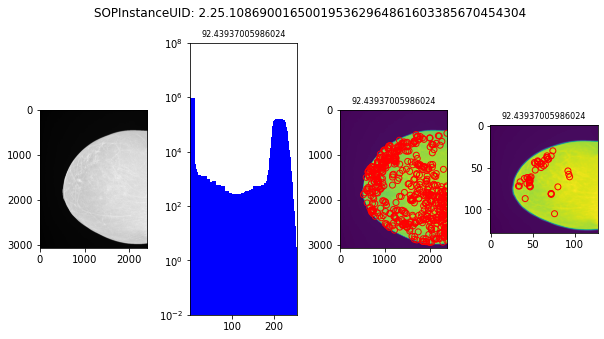

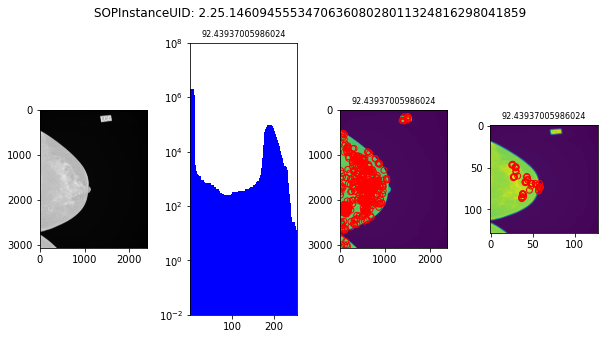

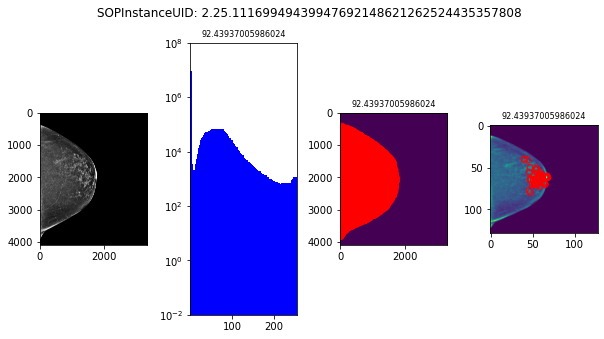

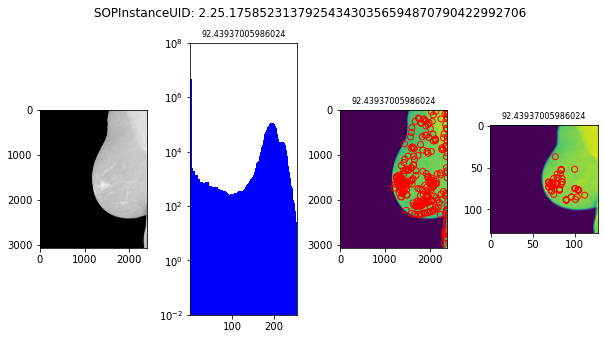

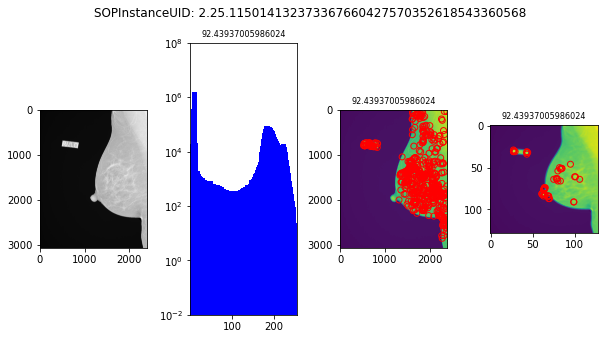

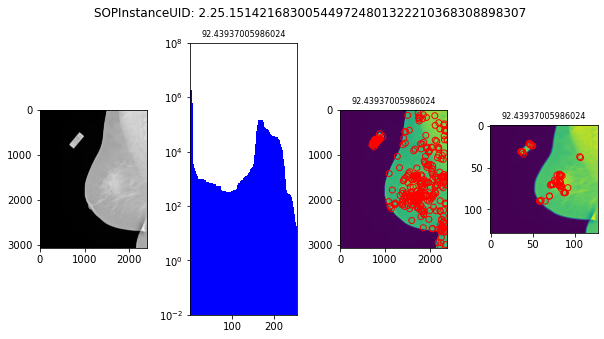

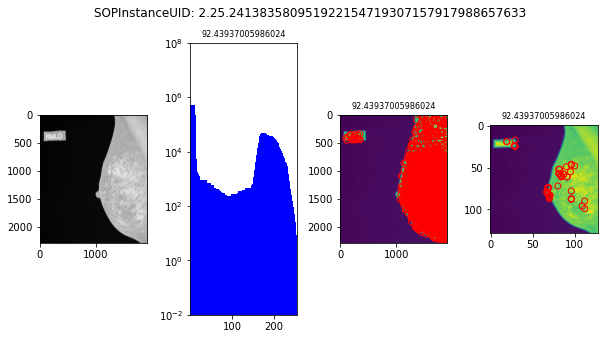

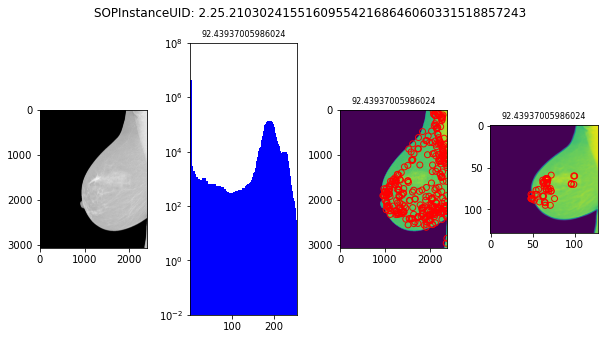

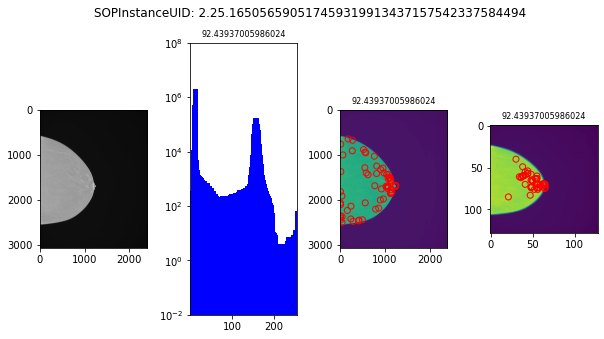

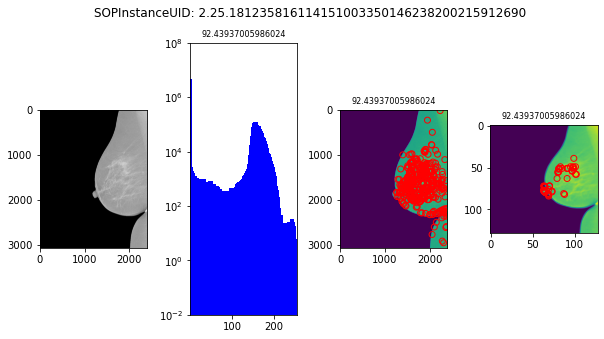

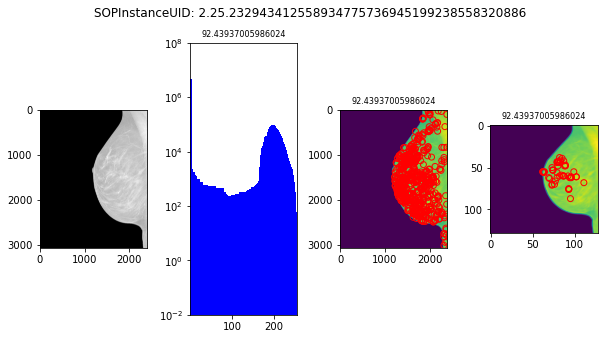

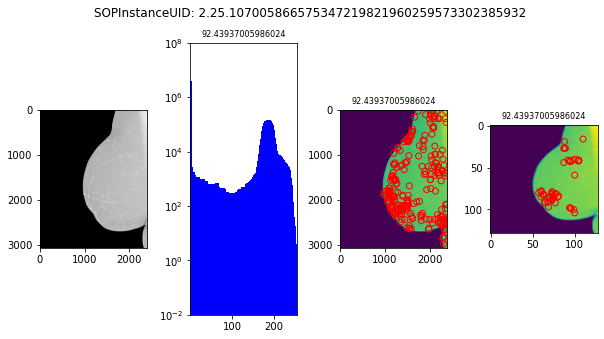

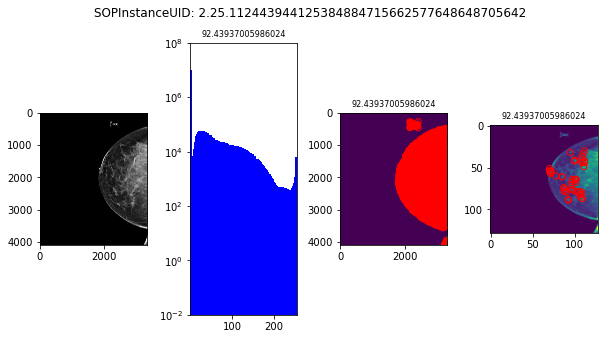

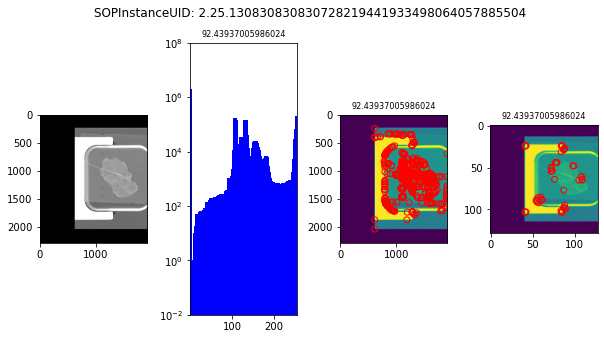

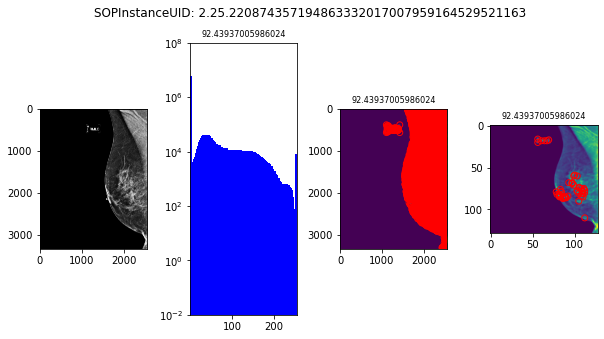

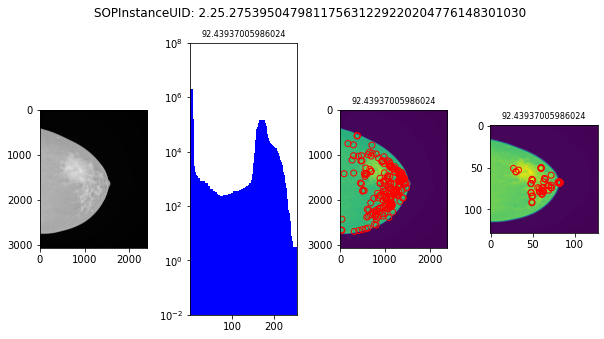

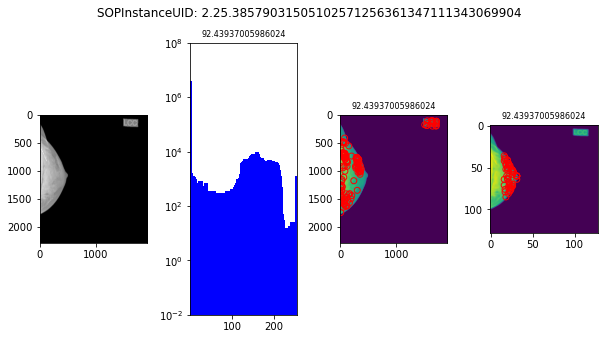

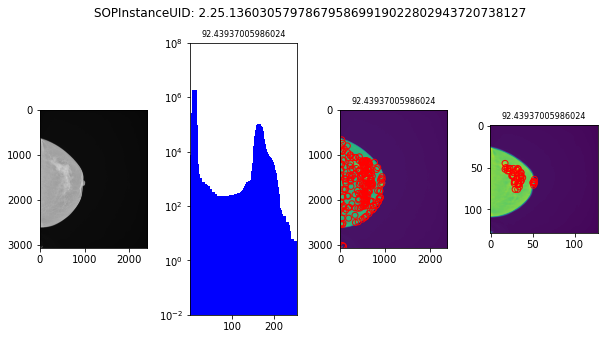

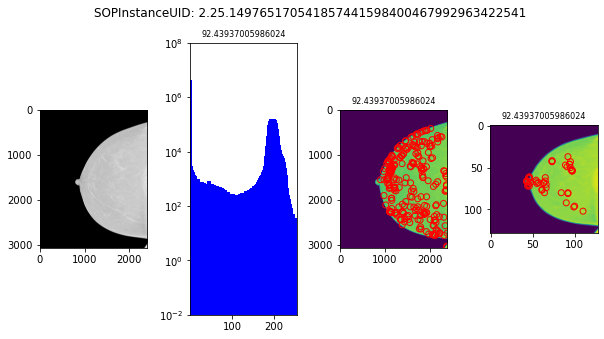

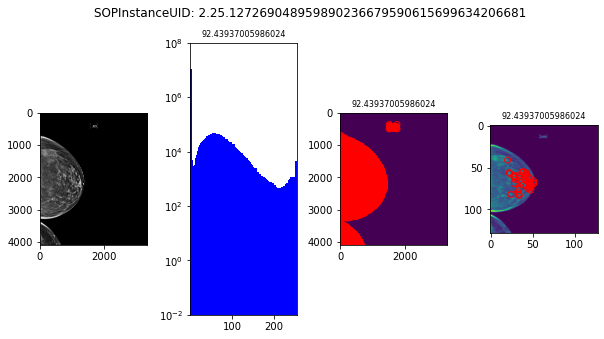

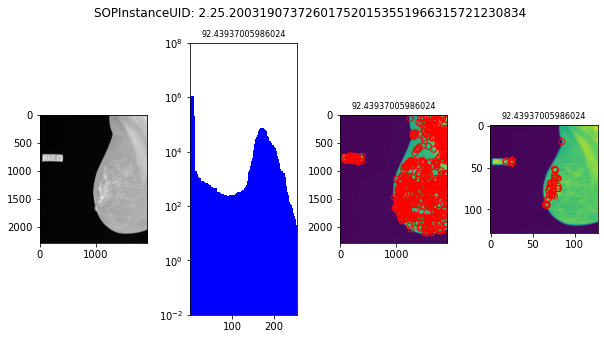

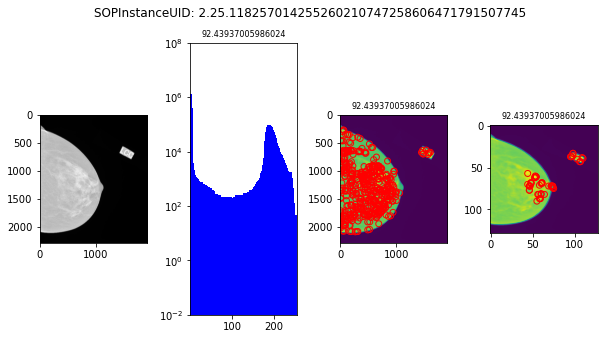

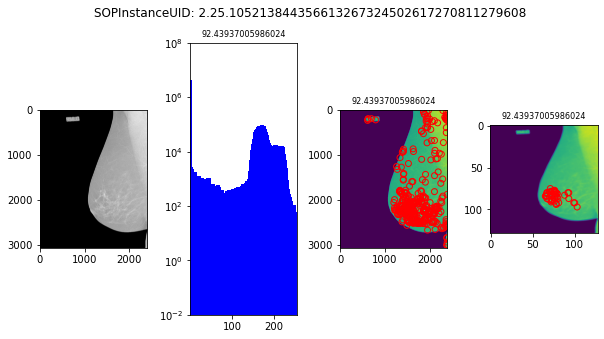

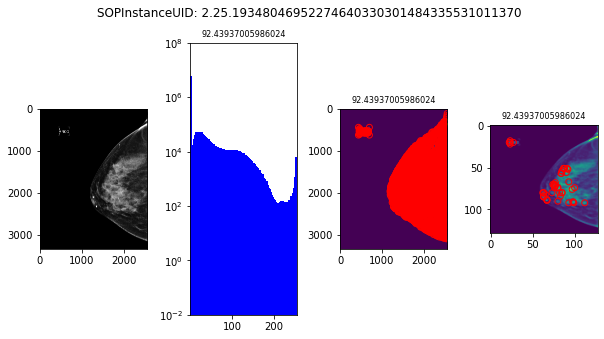

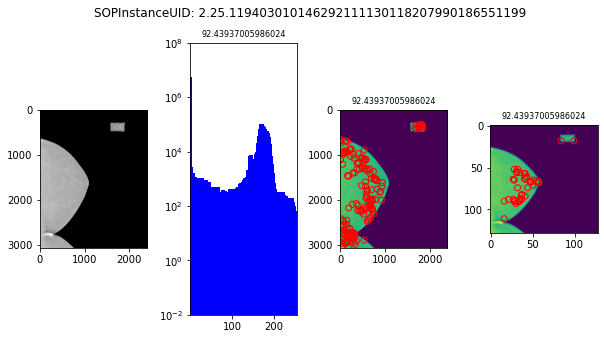

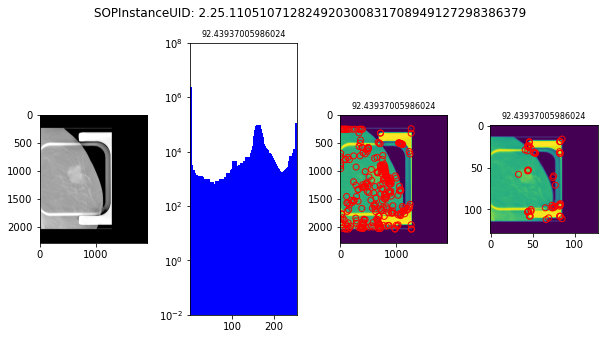

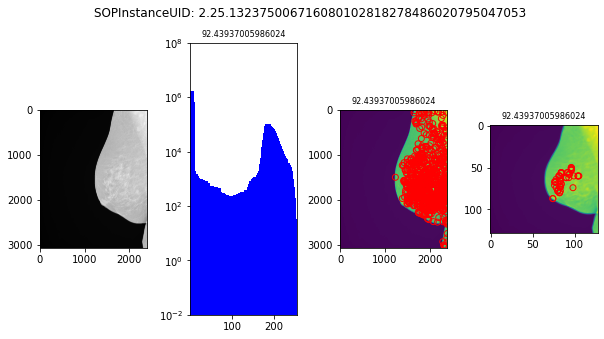

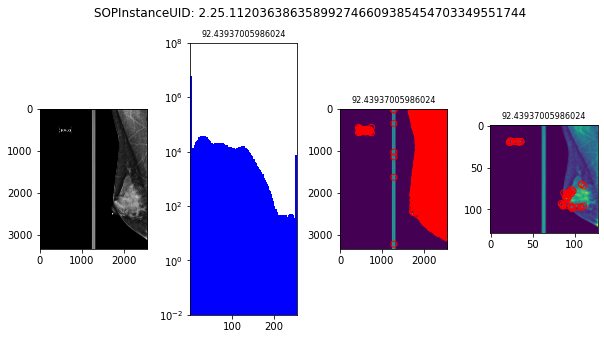

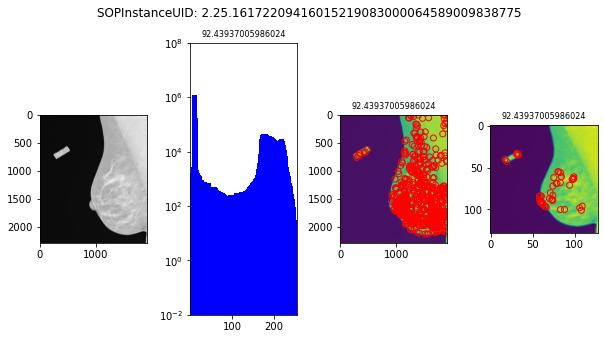

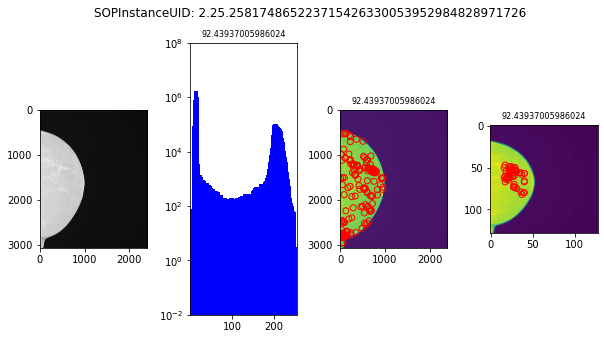

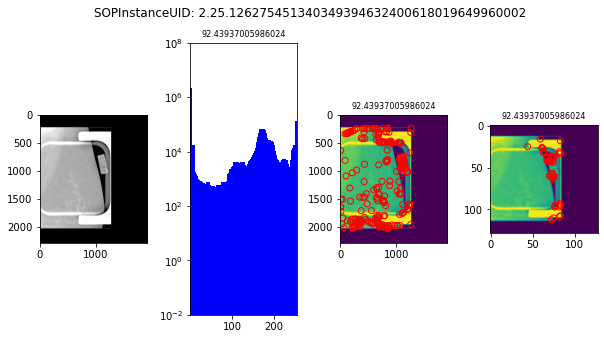

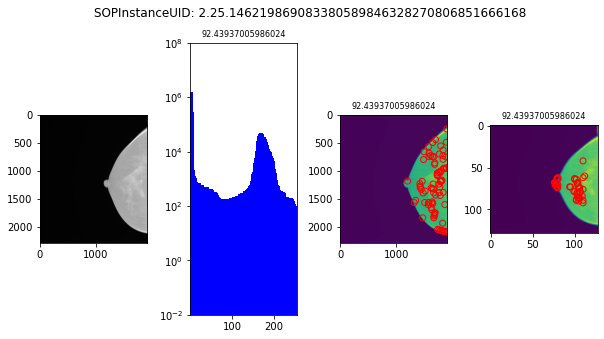

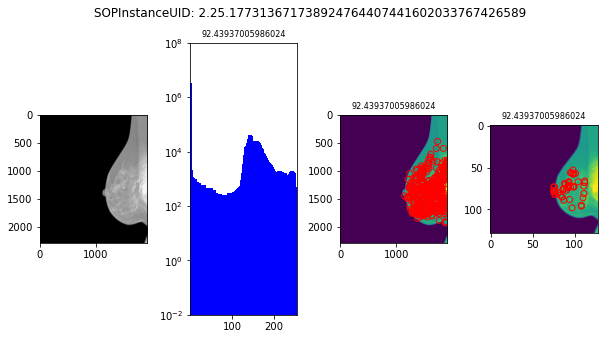

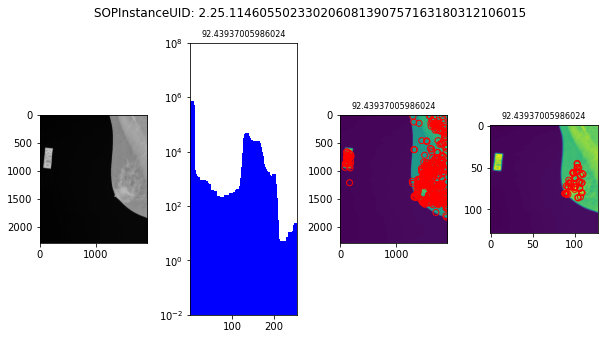

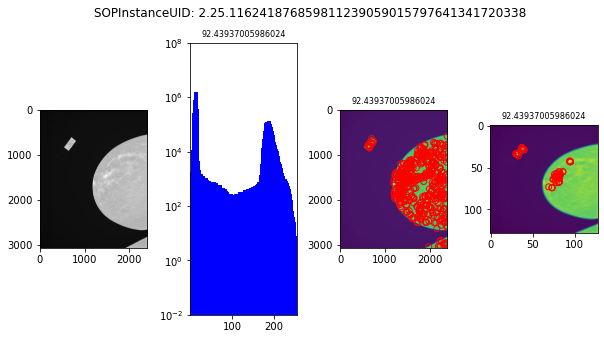

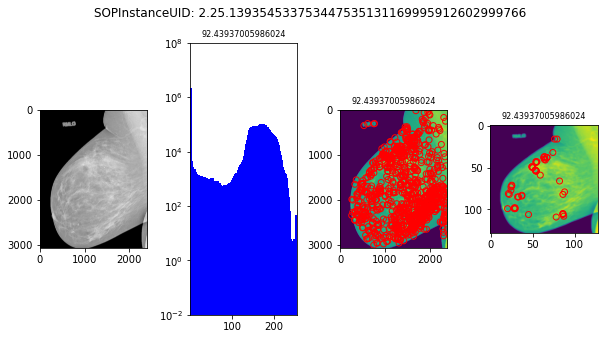

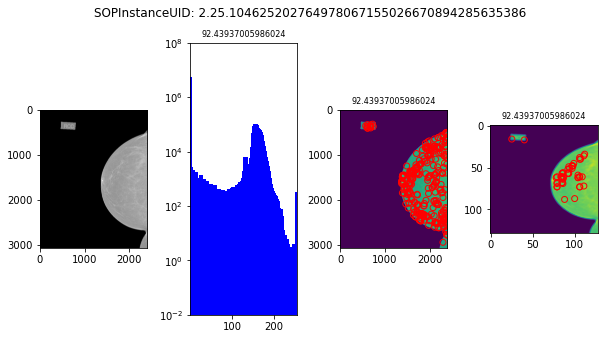

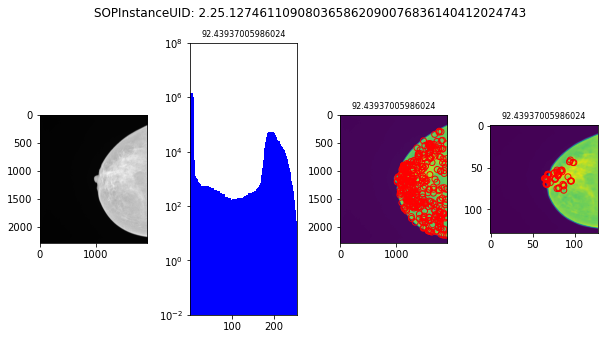

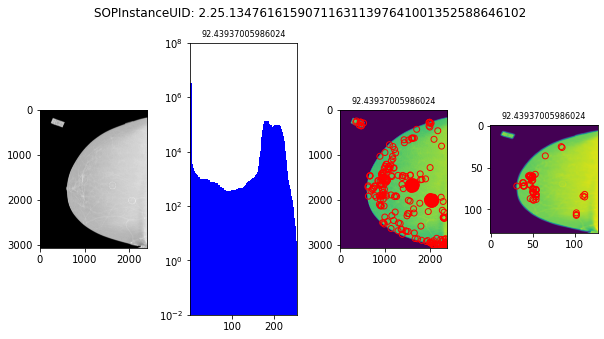

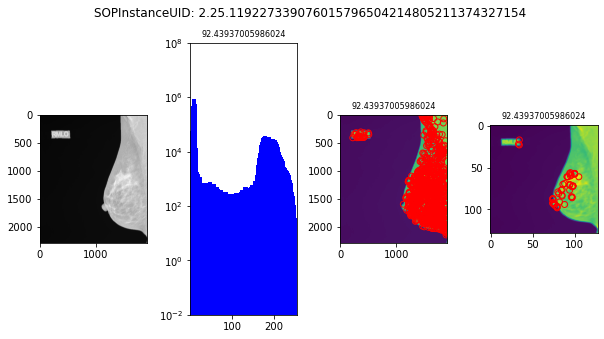

In [8]:
O.Features.view_image_and_features(imgs, feature_types=['hist', 'sift', 'orb'], train_scores=[scores])

In [13]:
O.OutlierDetector.show_records()

{
    "orb_8%_d3609ee521c4eecd34e557c487a8fc43": {
        "ECOD": -1,
        "LOF": -1,
        "OCSVM": -1,
        "IForest": -1,
        "CBLOF": -1,
        "COPOD": -1,
        "SOS": -1,
        "KDE": -1,
        "Sampling": -1,
        "GMM": -1,
        "PCA": -1,
        "MCD": -1,
        "LMDD": -1,
        "COF": -1,
        "HBOS": -1,
        "KNN": -1,
        "AvgKNN": -1,
        "MedKNN": -1,
        "SOD": -1,
        "INNE": -1,
        "FB": -1,
        "LODA": -1,
        "SUOD": -1,
        "AE": -1,
        "VAE": -1,
        "SOGAAL": -1,
        "MOGAAL": -1,
        "DeepSVDD": -1,
        "AnoGAN": -1
    },
    "orb_8%_d3609ee521c4eecd34e557c487a8fc43_config": {
        "kwargs": {
            "contamination": 0.18,
            "verbose": false
        }
    }
}
